In [ ]:
!mkdir ~/.kaggle
!cp kaggle.json ~/.kaggle

In [ ]:
!kaggle datasets download -d msambare/fer2013

 96% 58.0M/60.3M [00:03<00:00, 24.5MB/s]
100% 60.3M/60.3M [00:03<00:00, 17.6MB/s]


In [ ]:
import zipfile
zip=zipfile.ZipFile('/content/fer2013.zip')
zip.extractall('/content')
zip.close()

In [ ]:
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras import layers
from keras.layers import Dense,Conv2D,MaxPooling2D
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Conv2D, Flatten, BatchNormalization, Dense, MaxPooling2D, Activation,Dropout

In [ ]:
batch_size=128
image_size=256
data=tf.keras.preprocessing.image_dataset_from_directory(
    'train',
    shuffle=True,
    batch_size=batch_size,
    image_size=(image_size,image_size),
)

Found 28709 files belonging to 7 classes.


In [ ]:
class_names=data.class_names
class_names

['angry', 'disgust', 'fear', 'happy', 'neutral', 'sad', 'surprise']

In [ ]:
for images,labels in data.take(1):
  print(images.shape)
  print(labels.numpy())

(128, 256, 256, 3)
[0 3 6 4 5 6 3 0 6 3 2 3 6 3 3 5 2 3 2 0 0 2 2 4 4 0 0 3 3 4 4 4 3 5 3 4 0
 3 4 3 3 3 5 4 3 2 2 3 3 5 0 5 4 2 0 5 0 0 6 5 5 6 6 4 2 0 4 6 3 3 0 3 3 3
 6 5 3 4 1 2 5 6 3 5 3 2 4 2 0 5 3 4 4 5 4 5 0 3 6 2 3 2 3 4 2 3 4 4 3 0 6
 0 4 2 0 0 0 4 3 6 2 0 0 4 2 3 4 5]


In [ ]:
augmentation=tf.keras.Sequential([
    layers.experimental.preprocessing.RandomFlip("horizontal_and_vertical"),
  layers.experimental.preprocessing.RandomRotation(0.2),
])

In [ ]:
resizing=tf.keras.Sequential([
    layers.experimental.preprocessing.Resizing(256,256),
    layers.experimental.preprocessing.Rescaling(1.0/255)
])

In [ ]:
data = data.map(
    lambda x, y: (augmentation(x, training=True), y)
).prefetch(buffer_size=tf.data.AUTOTUNE)

In [ ]:
input_shape=(batch_size,image_size,image_size,3)
model = tf.keras.models.Sequential([
    resizing,
    augmentation,

    layers.Conv2D(64, kernel_size = (3,3), activation='relu', input_shape=input_shape),
    BatchNormalization(),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(128,  kernel_size = (3,3), activation='relu'),
    BatchNormalization(),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(256, (3, 3), activation='relu'),
    BatchNormalization(),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(512, (3, 3), activation='relu'),
    BatchNormalization(),
    layers.MaxPooling2D((2, 2)),

    layers.Flatten(),

    layers.Dense(512,activation='relu'),
    BatchNormalization(),

    layers.Dense(1024,activation='relu'),
    BatchNormalization(),

    layers.Dense(7, activation='softmax'),
])


model.build(input_shape)
model.compile(
    optimizer='adam',
     loss='SparseCategoricalCrossentropy',
    metrics=['accuracy']
)

In [ ]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential_1 (Sequential)   (128, 256, 256, 3)        0         
                                                                 
 sequential (Sequential)     (128, 256, 256, 3)        0         
                                                                 
 conv2d_4 (Conv2D)           (128, 254, 254, 64)       1792      
                                                                 
 batch_normalization_6 (Batc  (128, 254, 254, 64)      256       
 hNormalization)                                                 
                                                                 
 max_pooling2d_4 (MaxPooling  (128, 127, 127, 64)      0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (128, 125, 125, 128)     

In [ ]:
test_ds=tf.keras.preprocessing.image_dataset_from_directory(
    'test',
    batch_size=128,
    image_size=(256,256),
    shuffle=True,
)

Found 7178 files belonging to 7 classes.


In [ ]:
len(data)

225

In [ ]:
history=model.fit(data,
                  batch_size=batch_size,
                  #steps_per_epoch=len(data)//batch_size,
                  validation_data=test_ds,
                  #validation_steps=len(test_ds)//128,
                  #callbacks=callbacks_list,
                  epochs=30)

Epoch 1/30
225/225 [==============================] - 229s 882ms/step - loss: 1.9396 - accuracy: 0.2385 - val_loss: 2.3904 - val_accuracy: 0.2545
Epoch 2/30
225/225 [==============================] - 195s 861ms/step - loss: 1.7907 - accuracy: 0.2735 - val_loss: 2.1121 - val_accuracy: 0.1943
Epoch 3/30
225/225 [==============================] - 194s 857ms/step - loss: 1.7289 - accuracy: 0.3076 - val_loss: 2.5132 - val_accuracy: 0.1843
Epoch 4/30
225/225 [==============================] - 201s 888ms/step - loss: 1.6716 - accuracy: 0.3424 - val_loss: 1.8246 - val_accuracy: 0.2708
Epoch 5/30
225/225 [==============================] - 193s 853ms/step - loss: 1.5968 - accuracy: 0.3775 - val_loss: 1.7263 - val_accuracy: 0.3452
Epoch 6/30
225/225 [==============================] - 193s 854ms/step - loss: 1.5196 - accuracy: 0.4090 - val_loss: 1.8559 - val_accuracy: 0.2598
Epoch 7/30
225/225 [==============================] - 194s 858ms/step - loss: 1.4696 - accuracy: 0.4325 - val_loss: 1.6901 -

In [ ]:
history=model.fit(data,
                  batch_size=batch_size,
                  #steps_per_epoch=len(data)//batch_size,
                  validation_data=test_ds,
                  #validation_steps=len(test_ds)//128,
                  #callbacks=callbacks_list,
                  epochs=10)

Epoch 1/10
225/225 [==============================] - 199s 883ms/step - loss: 0.9323 - accuracy: 0.6567 - val_loss: 1.3361 - val_accuracy: 0.5242
Epoch 2/10
225/225 [==============================] - 192s 850ms/step - loss: 0.9197 - accuracy: 0.6639 - val_loss: 1.2410 - val_accuracy: 0.5483
Epoch 3/10
225/225 [==============================] - 192s 850ms/step - loss: 0.8971 - accuracy: 0.6707 - val_loss: 1.2396 - val_accuracy: 0.5440
Epoch 4/10
225/225 [==============================] - 191s 846ms/step - loss: 0.8840 - accuracy: 0.6772 - val_loss: 1.3160 - val_accuracy: 0.5297
Epoch 5/10
225/225 [==============================] - 199s 879ms/step - loss: 0.8591 - accuracy: 0.6867 - val_loss: 1.4271 - val_accuracy: 0.5134
Epoch 6/10
225/225 [==============================] - 191s 847ms/step - loss: 0.8589 - accuracy: 0.6860 - val_loss: 1.5931 - val_accuracy: 0.4650
Epoch 7/10
225/225 [==============================] - 192s 850ms/step - loss: 0.8333 - accuracy: 0.6950 - val_loss: 1.5838 -

In [ ]:
model.evaluate(test_ds)

57/57 [==============================] - 14s 229ms/step - loss: 1.5528 - accuracy: 0.5100


[1.5528459548950195, 0.5100306272506714]

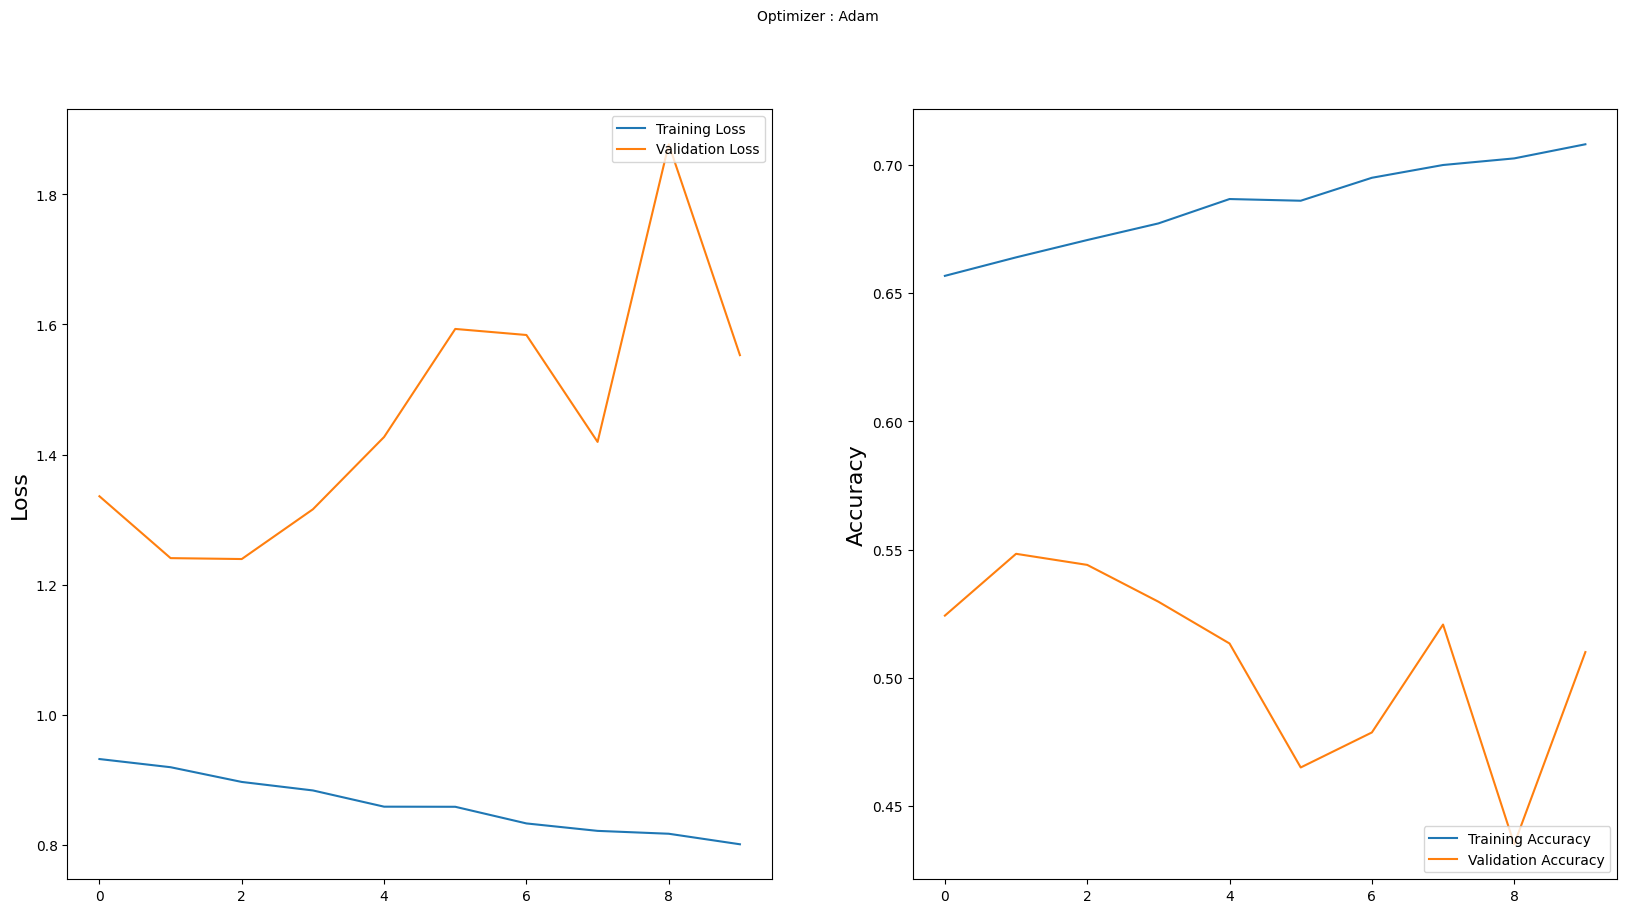

In [ ]:
plt.figure(figsize=(20,10))
plt.subplot(1, 2, 1)
plt.suptitle('Optimizer : Adam', fontsize=10)
plt.ylabel('Loss', fontsize=16)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend(loc='upper right')

plt.subplot(1, 2, 2)
plt.ylabel('Accuracy', fontsize=16)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend(loc='lower right')
plt.show()

In [ ]:
from tensorflow.keras.models import load_model
from google.colab import files
model.save('emotion_model8.h5')

In [ ]:
files.download('emotion_model8.h5')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>